### TP : Traitement du signal 2
### Objectif

L'objectif de ce TP est de mettre en oeuvre une communication numérique entre deux ordinateur via une liaison Jack. 

### Matériel

- 2 Ordinateurs sous Ubuntu avec Python et Jupyter
- 1 Canal composé d’une boîte noire et de deux câbles jack

### Questions

1. Mettre en oeuvre une chaîne de communication numérique.
2. Quelle modulation sera utilisée lors de ce TP ? Pourquoi ? 
3. Essayer de transmettre des messages avec différentes forme d’onde. 
4. Quelle est la forme d’onde la plus robuste aux bruits ?
5. Quelle est l’interêt du code ASCII ? 
6. Existe-t-il un code source plus avantageux que le ASCII ?

## Code

Voici le code Python à utiliser pour enregistrer une communication numérique :

```
# Importer les bibliothèques nécessaires
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import comnumfip2


signal = comnumfip2.receive_signal() #Acquisition du signal 

signal_binaire = commnumfip2.sample_and_threshold(signal)

#La ligne ci-dessus permet d'échantillonner et de seuiller le signal acquérit.
```


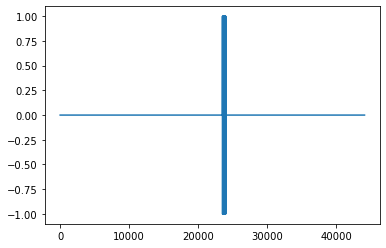

[1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 1 0 1 0]
48



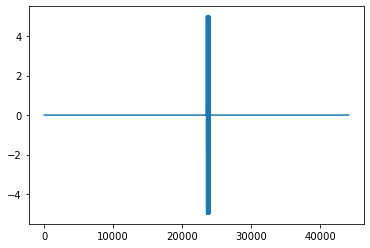

In [340]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os


reload(comnumfip2)




fs=44100
duration=1
analog_test =[]

while len(analog_test)==0:
    scrut = sd.rec(int(duration*fs),samplerate=fs,channels=1)
    sd.wait()
    #Filtre de réception
    mask = (scrut<-0.8) | (scrut>0.8) #On garde tout ce qui a une amplitude de plus de 0.9V
    analog_test = scrut[mask]

signal = sd.rec(int(1*fs),samplerate=fs,channels=1)
sd.wait()
#Filtre de réception
mask = (signal<-0.8) | (signal>0.8) #On garde tout ce qui a une amplitude de plus de 0.9V
signal_test = signal[mask]

plt.plot(signal)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

nb=0
x_last=0

for x in signal_test:
    if x_last == x :
        nb+=1
    else:
        if nb < 10:
            for y in range(nb):
               signal_test[y]=100
            nb=0
        if nb >= 10:
            nb=0
            pass
    x_last=x


#np.delete(signal_test,np.where(signal_test==100))

signal=signal.flatten()

filtered_signal = np.correlate(signal, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(signal_test,0.8)
print(bin)
print(len(bin))
print(comnumfip2.bin2ascii(bin))


(6000.0, 8000.0)

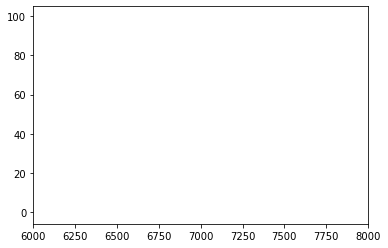

In [337]:
os.system("amixer -q set Master 100%")
os.system("amixer -q set Capture 70%")


plt.plot(signal_test)
plt.xlim(6000,8000)

In [170]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)


plt.plot(analog)
plt.xlim(9200,9500)
#plt.plot(filtered_signal)
plt.xlim(9250,9400)

plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(filtered_signal,0.9)
print(bin)
print(comnumfip2.bin2ascii(bin))

NameError: name 'analog' is not defined